Visualize Neural Network
https://playground.tensorflow.org/

* 0.001 linear 1,2
* 0.001 sigmoid 1,2
* 0.01 sigmoid 1,2
* 0.001 relu 1,2
* 0.001 tanh 1,4 1500 epoch
* 0.03 tanh 4 1500 epoch


### Install Required Packages

In [ ]:
!pip install medmnist
!pip install Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=ef9e802066a554d633119618ba4a2dbf11a66e718ce57b1f2811aeaba5aea8cd
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


### Import Package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
from tqdm import tqdm
import numpy as np

import medmnist
from medmnist import INFO, Evaluator

In [ ]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.2.3 @ https://github.com/MedMNIST/MedMNIST/


### Parameters

In [ ]:
epoch = 2
learning_rate = 0.001
batch_size = 32
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_used = tf.keras.losses.CategoricalCrossentropy()

### Load Dataset

In [ ]:

from medmnist import BloodMNIST, DermaMNIST

First, we read the data, preprocess them and encapsulate them into dataloader form.

###Training Set

In [ ]:
# load the data
train_dataset = BloodMNIST(split='train', download=True)


print(train_dataset)

100%|██████████| 35461855/35461855 [00:02<00:00, 12187283.50it/s]


Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 11959
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License: CC BY 4.0


In [ ]:
print(len(train_dataset))
print(train_dataset[0])
print(train_dataset[0][0])
print(train_dataset[0][1])

11959
(<PIL.Image.Image image mode=RGB size=28x28 at 0x7D80D253A5F0>, array([7]))
<PIL.Image.Image image mode=RGB size=28x28 at 0x7D80D2539090>
[7]


In [ ]:
def montage(self, length=20, replace=False, save_folder=None):
        from medmnist.utils import montage2d

        n_sel = length * length
        sel = np.random.choice(self.__len__(), size=n_sel, replace=replace)

        montage_img = montage2d(imgs=self.imgs,
                                n_channels=self.info['n_channels'],
                                sel=sel)

        if save_folder is not None:
            if not os.path.exists(save_folder):
                os.makedirs(save_folder)
            montage_img.save(os.path.join(save_folder,
                                          f"{self.flag}_{self.split}_montage.jpg"))

        return montage_img

In [ ]:
train_dataset.montage(length=1)

/usr/local/lib/python3.10/dist-packages/medmnist/utils.py:31: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


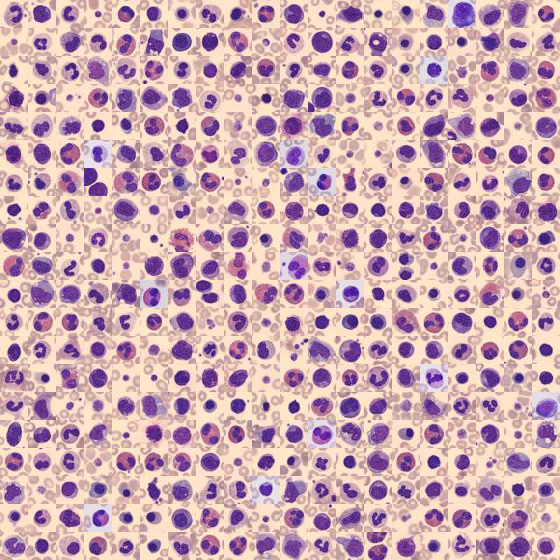

In [ ]:
train_dataset.montage(length=20)

In [ ]:
x, y = train_dataset[0]

print(np.array(x).shape, y.shape)

(28, 28, 3) (1,)


In [ ]:
print(len(train_dataset))
class_count = [0,0,0,0,0,0,0,0]
for i in range(0,len(train_dataset)):
  x,y = train_dataset[i]
  # print(type(y))
  # print(y)
  # print(len(y))
  class_count[y[0]]+=1
print(class_count)

11959
[852, 2181, 1085, 2026, 849, 993, 2330, 1643]


In [ ]:
from PIL import Image

im = np.asarray(train_dataset[0][0])
print(im.shape)
img = Image.fromarray(im)
img

(28, 28, 3)


In [ ]:
no_of_class = 8
def read_data(data):
  x,y = data[0]
  x = np.array(x)
  data_x_new = np.zeros((len(data),x.shape[0],x.shape[1],x.shape[2]),dtype=float)
  data_y_new = np.zeros((len(data),no_of_class),dtype=float)
  for i in range(0,len(data)):
    x,y = data[i]
    x_new = np.asarray(x)
    y_new = np.zeros(no_of_class,dtype=float)
    y_new[y[0]] = 1
    data_x_new[i]=x_new
    data_y_new[i]=y_new
  return data_x_new,data_y_new


In [ ]:
train_x, train_y = read_data(train_dataset)
print(train_x.shape,train_y.shape)

(11959, 28, 28, 3) (11959, 8)


In [ ]:
print(train_x[0])
print(train_y[0])

[[[250. 223. 206.]
  [255. 229. 212.]
  [251. 222. 206.]
  ...
  [255. 238. 195.]
  [251. 230. 185.]
  [255. 234. 191.]]

 [[255. 229. 210.]
  [255. 229. 210.]
  [244. 215. 199.]
  ...
  [254. 232. 193.]
  [254. 233. 190.]
  [255. 242. 201.]]

 [[255. 231. 208.]
  [255. 227. 205.]
  [238. 210. 189.]
  ...
  [255. 233. 202.]
  [251. 229. 192.]
  [255. 242. 203.]]

 ...

 [[233. 204. 172.]
  [239. 210. 180.]
  [245. 218. 188.]
  ...
  [255. 225. 199.]
  [255. 226. 200.]
  [255. 228. 199.]]

 [[215. 184. 156.]
  [218. 188. 160.]
  [228. 198. 170.]
  ...
  [255. 225. 201.]
  [254. 227. 200.]
  [255. 228. 201.]]

 [[217. 182. 162.]
  [212. 180. 159.]
  [213. 181. 158.]
  ...
  [254. 226. 204.]
  [255. 227. 203.]
  [255. 228. 201.]]]
[0. 0. 0. 0. 0. 0. 0. 1.]


### Validation set

In [ ]:
# load the data
val_dataset = BloodMNIST(split='val', download=True)

print(val_dataset)

Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 1712
    Root location: /root/.medmnist
    Split: val
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×

In [ ]:
x, y = val_dataset[0]

print(np.array(x).shape, y.shape)

(28, 28, 3) (1,)


In [ ]:
print(len(val_dataset))
class_count = [0,0,0,0,0,0,0,0,0]
for i in range(0,len(val_dataset)):
  x,y = val_dataset[i]
  # print(type(y))
  # print(y)
  # print(len(y))
  class_count[y[0]]+=1
print(class_count)

1712
[122, 312, 155, 290, 122, 143, 333, 235, 0]


In [ ]:
from PIL import Image

im = np.asarray(train_dataset[0][0])
print(im.shape)
img = Image.fromarray(im)
img

(28, 28, 3)


In [ ]:
val_x, val_y = read_data(val_dataset)
print(val_x.shape,val_y.shape)

(1712, 28, 28, 3) (1712, 8)


### Test Set

In [ ]:
# load the data
test_dataset = BloodMNIST(split='test', download=True)

print(test_dataset)

Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 3421
    Root location: /root/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200

In [ ]:
x, y = test_dataset[0]

print(np.array(x).shape, y.shape)
print(y)

(28, 28, 3) (1,)
[3]


In [ ]:
print(len(test_dataset))
class_count = [0,0,0,0,0,0,0,0,0]
for i in range(0,len(test_dataset)):
  x,y = test_dataset[i]
  # print(type(y))
  # print(y)
  # print(len(y))
  class_count[y[0]]+=1
print(class_count)

3421
[244, 624, 311, 579, 243, 284, 666, 470, 0]


In [ ]:
test_x, test_y = read_data(test_dataset)
print(test_x.shape,test_y.shape)

(3421, 28, 28, 3) (3421, 8)


### Neural Networks

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
input_layers = layers.Input(shape=(28,28,3,))
y = layers.Flatten()(input_layers)
y = layers.Dense(1024,activation=tf.nn.relu)(y)
y = layers.Dense(512,activation=tf.nn.relu)(y)
y = layers.Dense(256,activation=tf.nn.relu)(y)
y = layers.Dense(128,activation=tf.nn.relu)(y)
y = layers.Dense(64,activation=tf.nn.relu)(y)
y = layers.Dense(32,activation=tf.nn.relu)(y)
y = layers.Dense(16,activation=tf.nn.relu)(y)
output_layers = layers.Dense(8,activation='softmax')(y)
nn_model = tf.keras.Model(inputs = input_layers, outputs = output_layers)


In [ ]:
nn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 1024)              2409472   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256  

In [ ]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [ ]:
nn_history = nn_model.fit(train_x,train_y,epochs=epoch,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))


Epoch 1/2
374/374 [==============================] - 10s 23ms/step - loss: 14.2144 - accuracy: 0.1632 - val_loss: 2.0498 - val_accuracy: 0.1822
Epoch 2/2
374/374 [==============================] - 7s 20ms/step - loss: 2.0349 - accuracy: 0.1824 - val_loss: 2.0228 - val_accuracy: 0.1822


In [ ]:
score = nn_model.evaluate(test_x, test_y, verbose = 0)
print(score)

[2.022663116455078, 0.1824028044939041]


###VGG

Visualize Convolution: https://poloclub.github.io/cnn-explainer/

about filters: https://sbme-tutorials.github.io/2018/cv/notes/4_week4.html

In [ ]:
from tensorflow.keras import models, layers

In [ ]:


vgg_model = tf.keras.Sequential()
vgg_model.add(layers.Input((28,28,3)))
vgg_model.add(layers.ZeroPadding2D((2,2)))
vgg_model.add(layers.Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(4096,activation='relu'))
vgg_model.add(layers.Dense(256,activation='relu'))
vgg_model.add(layers.Dense(8,activation='softmax'))

In [ ]:
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [ ]:
vgg_history = vgg_model.fit(train_x,train_y,epochs=epoch,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))


Epoch 1/2
374/374 [==============================] - 180s 477ms/step - loss: 1.2951 - accuracy: 0.5530 - val_loss: 0.5919 - val_accuracy: 0.7868
Epoch 2/2
374/374 [==============================] - 181s 483ms/step - loss: 0.6023 - accuracy: 0.7776 - val_loss: 0.4530 - val_accuracy: 0.8277


In [ ]:
score = vgg_model.evaluate(test_x, test_y, verbose = 0)
print(score)

[0.4703370928764343, 0.8363052010536194]


In [ ]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 32, 32, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       1

### ResNet

Visualize CNN models: https://adamharley.com/nn_vis/cnn/3d.html

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import resnet50

In [ ]:
input_layer=layers.Input(shape=(28,28,3))
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=True)
resnet_model.summary()
last_layer = resnet_model.get_layer('avg_pool').output

102967424/102967424 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 34, 34, 3)            0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 14, 14, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 14, 14, 64)           256       ['conv1_conv[0][0]']          
 on)                    

In [ ]:
flatten=layers.Flatten()(last_layer)
output_layer=layers.Dense(no_of_class,activation='softmax')(flatten)
rs50_model = tf.keras.Model(inputs = input_layer, outputs = output_layer)

In [ ]:
rs50_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 34, 34, 3)            0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 14, 14, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 14, 14, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
rs50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [ ]:
rs50_history = rs50_model.fit(train_x,train_y,epochs=epoch-1,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))


374/374 [==============================] - 825s 2s/step - loss: 0.7946 - accuracy: 0.7516 - val_loss: 5.9759 - val_accuracy: 0.5654


In [ ]:
score = rs50_model.evaluate(test_x, test_y, verbose = 0)
print(score)

[5.224215030670166, 0.5729318857192993]
